# Amazon Dataset

In [49]:
pip install sqlalchemy mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
#Import necessay libraries
import numpy as np 
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# MySQL database connection configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'kenyan23',
    'database': 'ecommerce_db'
}

In [16]:
# Create SQLAlchemy engine using the db_config dictionary
engine = create_engine(
    f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}"
)

cont = engine.connect()

In [8]:
# Establish connection to MySQL database
conn = mysql.connector.connect(**db_config)

In [9]:
def execute_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
    cursor.close()

## Data Preprocessing

### Loading the Dataset

In [51]:
#loading dataset
df = pd.read_csv('amazon.csv')

Exploring Dataset

In [52]:
#Get information of the no. of rows and columns
df.shape

(1465, 16)

In [53]:
#titles of the 12 columns
print (df.columns.values)

['product_id' 'product_name' 'category' 'discounted_price' 'actual_price'
 'discount_percentage' 'rating' 'rating_count' 'about_product' 'user_id'
 'user_name' 'review_id' 'review_title' 'review_content' 'img_link'
 'product_link']


In [54]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.tail(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1455,B00GHL8VP2,USHA 1212 PTC with Adjustable Thermostat Fan H...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹3,487.77","₹4,990",30%,4.1,"1,127",Meant for Spot Heating|Room Size: Upto 15 sq f...,"AECFYIUCHSZXDLACTYPEUSM5DIKA,AF546S43YKYCJWRD7...","Manoj Kumar,Arun Thottakathu Prasannakumar,son...","R1T19FVDX8Z7T2,R1E1AMYN17K7HJ,R20AXB80IQO0DK,R...","I like this product,Simple easy to use, but no...",",Cost effective. This is good for heating your...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Usha-1212-PTC-Adjustable...
1456,B0B9JZW1SQ,"4 in 1 Handheld Electric Vegetable Cutter Set,...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹498,"₹1,200",59%,3.2,113,{ 4 in 1 multi-function Electric Vegetable Cut...,"AFCTMQKPVJI6Y2JPIGDKRKIAV43A,AF6XUHN32GSFA7LFG...","Ashish,Kavita J.,Sundar,Tessy S.,saurabh manro...","R3N2A5DV7IPG6R,RXX6FP17PFNBS,R1JENN8Y0UV8G,RXP...","Cutter speed and power is very low,Nt happy wi...",",It's nt wrkng evn aftr 4 hours of charging,Th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Handheld-Electric-Vegeta...
1457,B00TI8E7BI,Philips HD9306/06 1.5-Litre Electric Kettle (M...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,695","₹2,695",0%,4.4,"2,518","Food grade stainless steel, Frequency: 50 Hz. ...","AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3...","AmazonCust,DD_Zen,Amazon Customer,VINISH THOMA...","R252H4TFMWK9L7,R3SAFGRVGD7GTV,R1FVCFYT4SGY76,R...","3,Sturdy and Works Flawlessly,Excellent 👍,Real...","Cord is small and sound while heating,Well bui...",https://m.media-amazon.com/images/I/41JyZuDzDg...,https://www.amazon.in/Philips-HD9306-06-1-5-Li...
1458,B07J9KXQCC,"Libra Room Heater for Home, Room Heaters Home ...","Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",₹949,"₹2,299",59%,3.6,550,"Libra room heater for home has cool, warm or h...","AE5FZ5B3EEES45Q26PNUBTJ5DRYA,AGL2B432J2VDHOSUW...","gitesh jaiswal,Divyansh,Dr Paras,Amazon Custom...","R363CESXF8MX1J,RPFBIUJQY7U8J,R1RANSDWMZLOFX,R2...",Product functioning ok but price is quite high...,For the product like room heater package shoul...,https://m.media-amazon.com/images/I/51GEjZAmNR...,https://www.amazon.in/LIBRA-Portable-Heater-Ad...
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",₹199,₹999,80%,3.1,2,"Versatile, Protects Your Clothes: MoveCatcher ...",AFPKVN5KLHB4MHSYDS25Q5MIWWKQ,Kunal Sen,R18OKMWGX8SA0L,Useless,Does not work as advertised at all. The pieces...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Hair-Removers-Laundry-Re...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitch

In [55]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [56]:
#checking for missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [57]:
#rating count has less values
# Using median to fill in the existing values 
# fill in missing values with the mean
# Remove commas (if numbers are formatted with commas)
df1 = df.copy()
# Remove commas and convert 'rating_count' to numeric safely
df1.loc[:, 'rating_count'] = df1['rating_count'].replace(',', '', regex=True)
df1.loc[:, 'rating_count'] = pd.to_numeric(df1['rating_count'], errors='coerce')

In [58]:
# Identify non-numeric values in the 'rating' column
invalid_ratings = df1[~df1["rating"].astype(str).str.replace(".", "", 1).str.isdigit()]["rating"].unique()
print("Invalid ratings found:", invalid_ratings)


Invalid ratings found: ['|']


In [59]:
# Convert 'rating' to numeric, setting errors='coerce' will turn invalid values into NaN
df1["rating"] = pd.to_numeric(df1["rating"], errors="coerce")

# Verify that the column is now numeric
print(df1["rating"].dtype)


float64


In [60]:
# Convert all values to string (important to avoid mixed types issue)
df1['rating_count'] = df1['rating_count'].astype(str)

# Remove commas
df1['rating_count'] = df1['rating_count'].str.replace(',', '', regex=True)

# Remove any non-numeric characters
df1['rating_count'] = df1['rating_count'].str.replace(r'[^0-9]', '', regex=True)

# Convert back to numeric type
df1['rating_count'] = pd.to_numeric(df1['rating_count'], errors='coerce')

# Fill NaN values with 0
df1['rating_count'].fillna(0, inplace=True)

# Verify the final datatype
print(df1['rating_count'].dtype)  # Should be int64 or float64


float64


/tmp/ipykernel_5801/3644431516.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['rating_count'].fillna(0, inplace=True)


In [61]:
print(df1['rating_count'].dtype)

float64


In [62]:
mean_rating_count = df1['rating_count'].mean()
print("Mean rating count:", mean_rating_count)

Mean rating count: 182705.64505119453


In [63]:
# Convert all values to string (to avoid mixed types issue)
df1['rating'] = df1['rating'].astype(str)

# Remove commas
df1['rating'] = df1['rating'].str.replace(',', '', regex=True)

# Remove any non-numeric characters EXCEPT decimals
df1['rating'] = df1['rating'].str.replace(r'[^0-9.]', '', regex=True)

# Convert back to numeric type (preserves float values)
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')

# Fill NaN values with 0
df1['rating'].fillna(0, inplace=True)

# Verify the final datatype
print(df1['rating'].dtype)  # Should be float64 (since we allow decimals)


float64


/tmp/ipykernel_5801/3265273564.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['rating'].fillna(0, inplace=True)


In [64]:
#confirming if missing values are handled
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Missing values are handled well and all columns have 1,465 values

In [65]:
# Check if the primary key column has duplicates
duplicates = df1[df1.duplicated(subset=['product_id'], keep=False)]  # Change 'id' to your primary key column

# Display duplicate entries
print(duplicates)


      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1007  B0B9BXKBC7  WeCool S5 Long Selfie Stick, with Large Reinfo...   
1010  B07GVGTSLN  Wayona Usb Type C Fast Charger Cable Fast Char...   
1017  B0B9BD2YL4  KINGONE Wireless Charging Pencil (2nd Generati...   
1018  B0BMXMLSMM  Lapster 65W compatible for OnePlus Dash Warp C...   
1019  B0141EZMAI  Gizga Essentials USB WiFi Adapter for PC, 150 ...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹39

### Data Cleaning

In [66]:
# Display data types
print(df1[['discounted_price', 'actual_price']].dtypes)

# Display first few rows to check for symbols
print(df1[['discounted_price', 'actual_price']].head())


discounted_price    object
actual_price        object
dtype: object
  discounted_price actual_price
0             ₹399       ₹1,099
1             ₹199         ₹349
2             ₹199       ₹1,899
3             ₹329         ₹699
4             ₹154         ₹399


In [67]:
# Remove currency symbols and commas, then convert to numeric
df1['discounted_price'] = df1['discounted_price'].replace('[^\d.]', '', regex=True)
df1['actual_price'] = df1['actual_price'].replace('[^\d.]', '', regex=True)

# Convert to numeric type
df1['discounted_price'] = pd.to_numeric(df1['discounted_price'], errors='coerce')
df1['actual_price'] = pd.to_numeric(df1['actual_price'], errors='coerce')


In [25]:
# Confirm data types
print(df1[['discounted_price', 'actual_price']].dtypes)

# Check for NaN values (if any errors occurred)
print(df1[['discounted_price', 'actual_price']].isnull().sum())

# Display first few rows
print(df1[['discounted_price', 'actual_price']].head())


discounted_price    float64
actual_price        float64
dtype: object
discounted_price    0
actual_price        0
dtype: int64
   discounted_price  actual_price
0             399.0        1099.0
1             199.0         349.0
2             199.0        1899.0
3             329.0         699.0
4             154.0         399.0


Dicounted and actual price has been converted from object type to float64. In addition, all commas and currencies were removed from the columns. There are no missing values in the two columns

In [68]:
# Display unique values in the 'category' column
print(df1['category'].unique()[:10])

['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'
 'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables'
 'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions'
 'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls'
 'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions'
 'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables'
 'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts'
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables']


In [69]:
# Extract the first category before the first "|"
df1['main_category'] = df1['category'].str.split('|').str[0]


In [70]:
# Standardize main category names
category_mapping = {
    "Computers&Accessories": "Computers",
    "Electronics": "Electronics",
    "HomeAudio": "Audio",
    "HomeTheater,TV&Video": "Home Theater",
}

# Apply the mapping
df1['main_category'] = df1['main_category'].replace(category_mapping)


In [71]:
# Display unique extracted categories
print(df1['main_category'].unique())

# Count products per category
print(df1['main_category'].value_counts())

['Computers' 'Electronics' 'MusicalInstruments' 'OfficeProducts'
 'Home&Kitchen' 'HomeImprovement' 'Toys&Games' 'Car&Motorbike'
 'Health&PersonalCare']
main_category
Electronics            526
Computers              453
Home&Kitchen           448
OfficeProducts          31
MusicalInstruments       2
HomeImprovement          2
Toys&Games               1
Car&Motorbike            1
Health&PersonalCare      1
Name: count, dtype: int64


I have extracted the first category and went on to clean it further. I have standardized the values and mapped it. I have then displayed it showing that there are 526 Electronics, and 453 computers etc. 

### Data Transformation

In [72]:
#creating a new column
df1['discount_amount'] = df1['actual_price'] - df1['discounted_price']
print(df1.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category',
       'discount_amount'],
      dtype='object')


In [73]:
# Remove '%' symbol and convert to float
df1['discount_percentage'] = df1['discount_percentage'].str.replace('%', '', regex=True)
df1['discount_percentage'] = pd.to_numeric(df1['discount_percentage'], errors='coerce')

In [74]:
#checking on cleaned data 
df1.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,discount_amount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.0,64,4.2,242690.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers,700.00
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,43,4.0,439940.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers,150.00
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.0,90,3.9,79280.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers,1700.00
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,53,4.2,943630.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers,370.00
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,61,4.2,169050.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers,245.00
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.0,85,3.9,248710.0,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...,Computers,851.00
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,65,4.1,151880.0,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long dur

# MySQL Database Intergration

In [33]:
# Create database if not exists
create_db_query = "CREATE DATABASE IF NOT EXISTS ecommerce_db;"
execute_query(create_db_query)


In [10]:
# Use the database
use_db_query = "USE ecommerce_db;"
execute_query(use_db_query)

In [73]:
execute_query("DROP TABLE IF EXISTS products;")


In [74]:
create_raw_data_table_query = """
CREATE TABLE IF NOT EXISTS products (
    product_id VARCHAR(50) PRIMARY KEY,
    product_name VARCHAR(500),
    category VARCHAR(255),
    discounted_price DECIMAL(10,2),
    actual_price DECIMAL(10,2),
    discount_percentage DECIMAL(5,2),
    rating DECIMAL(3,2),
    rating_count INT,
    about_product TEXT,
    user_id VARCHAR(256),
    user_name VARCHAR(255),
    review_id VARCHAR(256),
    review_title VARCHAR(500),
    review_content TEXT,
    img_link TEXT,
    product_link TEXT,
    main_category VARCHAR(255),
    discount_amount DECIMAL(10,2)
);
"""
execute_query(create_raw_data_table_query)

In [35]:
fetch_query = "SELECT * FROM products LIMIT 10"
# Load data into a Pandas DataFrame
fetched_df = pd.read_sql_query(fetch_query, conn)
fetched_df.head()


/tmp/ipykernel_20732/2077740863.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fetched_df = pd.read_sql_query(fetch_query, conn)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,discount_amount


In [36]:
df1.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,discount_amount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers,700.00
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers,150.00
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers,1700.00
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers,370.00
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers,245.00
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.0,85,3.9,24871,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...,Computers,851.00
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,65,4.1,15188,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not c

In [75]:
# Remove duplicate rows based on the primary key column ('id')
df_cleaned = df1.drop_duplicates(subset=['product_id'], keep='first')  # Keeps the first occurrence

# Save the cleaned CSV
cleaned_csv = "/home/sharry/Documents/KCB/Teaching/Amazon/cleaned_amazon.csv"
df_cleaned.to_csv(cleaned_csv, index=False)

print(f"✅ Duplicates removed! Cleaned CSV saved at: {cleaned_csv}")


✅ Duplicates removed! Cleaned CSV saved at: /home/sharry/Documents/KCB/Teaching/Amazon/cleaned_amazon.csv


In [39]:
# Load the cleaned CSV file
cleaned_csv_path = "/home/sharry/Documents/KCB/Teaching/Amazon/cleaned_amazon.csv"
df_cleaned = pd.read_csv(cleaned_csv_path)

# Table name in MySQL
table_name = "products"

# Save cleaned DataFrame to MySQL
df_cleaned.to_sql(name=table_name, con=engine, if_exists="append", index=False)

print("✅ Cleaned CSV successfully loaded into MySQL using SQLAlchemy!")


✅ Cleaned CSV successfully loaded into MySQL using SQLAlchemy!


### SQL Queries for Analysis​

In [18]:
top_10_query = """
SELECT product_name, CAST(rating_count AS UNSIGNED) AS rating_count 
FROM products 
ORDER BY rating_count DESC 
LIMIT 10;
"""
top_df = pd.read_sql_query(top_10_query, cont)
top_df

,product_name,rating_count
0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973
1,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973
3,boAt Bassheads 100 in Ear Wired Earphones with...,363713
4,boAt Bassheads 100 in Ear Wired Earphones with...,363713
5,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711
6,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836
7,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836
8,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832
9,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832


In [19]:
average_query = """SELECT category, AVG(rating) AS avg_rating FROM products
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 1;""" 

average_df = pd.read_sql_query(average_query, cont)
average_df


,category,avg_rating
0,Computers&Accessories|Tablets,4.6


In [20]:
discount_query = """
SELECT product_name, discount_percentage FROM products
WHERE discount_percentage > 50;""" 

discount_df = pd.read_sql_query(discount_query, cont)
discount_df


,product_name,discount_percentage
0,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,58.0
1,SanDisk Cruzer Blade 32GB USB Flash Drive,56.0
2,BlueRigger Digital Optical Audio Toslink Cable...,76.0
3,TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...,54.0
4,"HP X1000 Wired USB Mouse with 3 Handy Buttons,...",59.0
...,...,...
603,Syncwire LTG to USB Cable for Fast Charging Co...,80.0
604,Campfire Spring Chef Prolix Instant Portable W...,57.0
605,Room Heater Warmer Wall-Outlet 400 Watts Elect...,60.0
606,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,74.0


In [23]:
most_reviews_query = """
SELECT user_name, COUNT(*) AS review_count
FROM products
GROUP BY user_name
ORDER BY review_count DESC
LIMIT 1;
"""
reviews_df = pd.read_sql_query(most_reviews_query, cont)
reviews_df

,user_name,review_count
0,"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...",8


## Part 3: Data Analysis in Python

### EDA

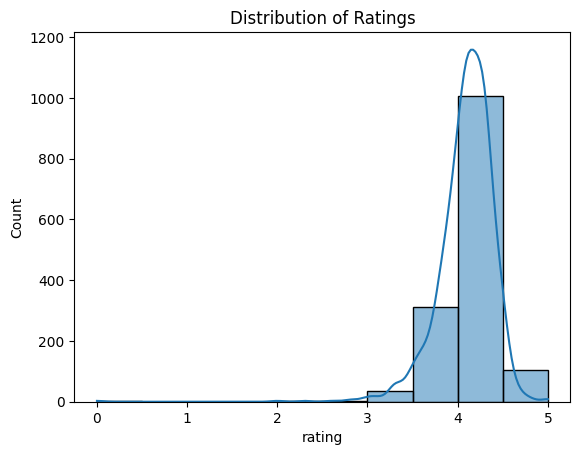

In [76]:
#Plotting Histogram

sns.histplot(df1['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()


In [77]:
#correlation 
df1[['discount_percentage', 'rating']].corr()


,discount_percentage,rating
discount_percentage,1.000000,-0.132556
rating,-0.132556,1.000000


In [78]:
df1.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,discount_amount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,242690.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,439940.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,79280.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,943630.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,169050.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers,245.0


In [79]:
#top selling product category
df1.groupby('category')['rating_count'].sum().sort_values(ascending=False).head(5)


category
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                         42049390.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    35478160.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                 24932690.0
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                       19060540.0
Electronics|WearableTechnology|SmartWatches                                          16444760.0
Name: rating_count, dtype: float64

### Data Visualization

In [80]:
df1.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
main_category           object
discount_amount        float64
dtype: object

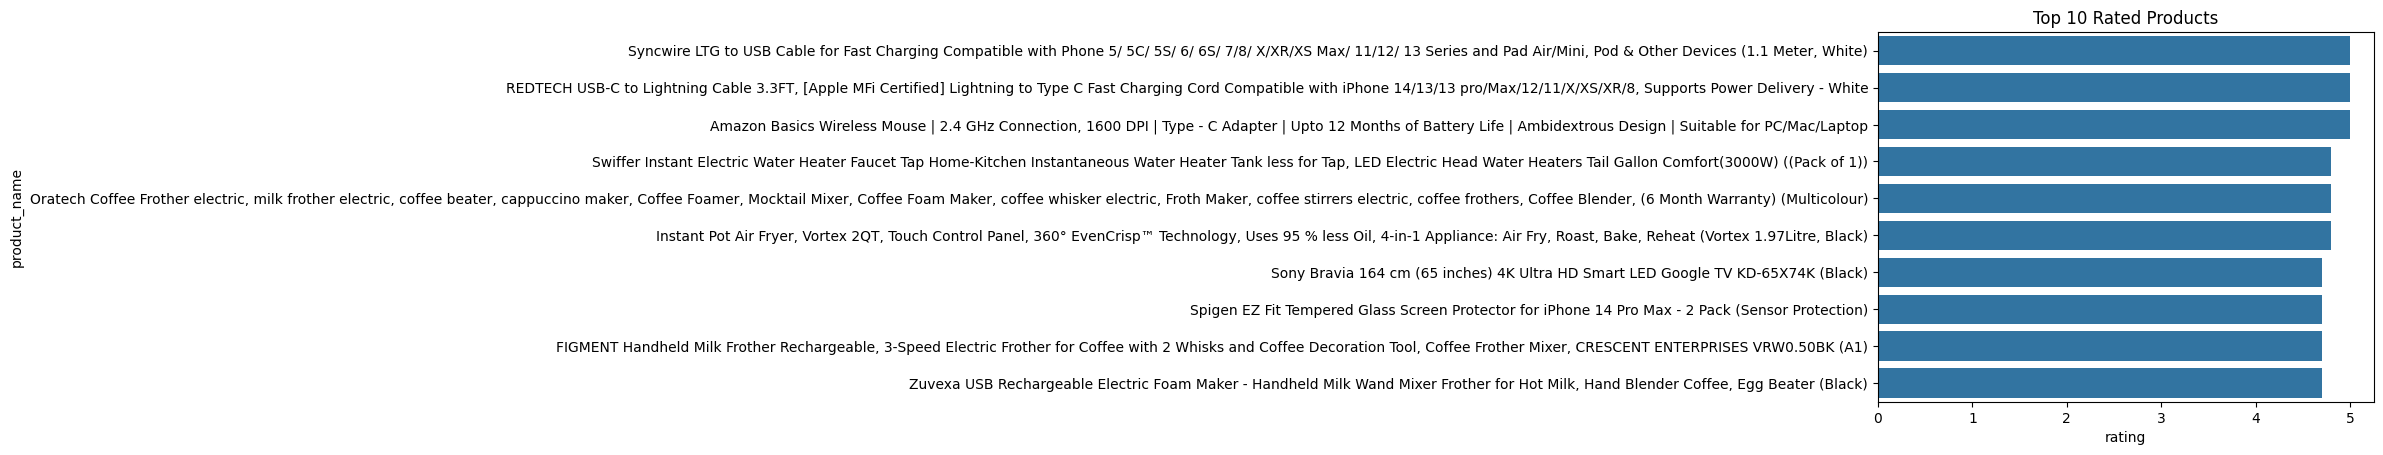

In [81]:
top_rated = df1.nlargest(10, 'rating')
sns.barplot(data=top_rated, x='rating', y='product_name')
plt.title('Top 10 Rated Products')
plt.show()


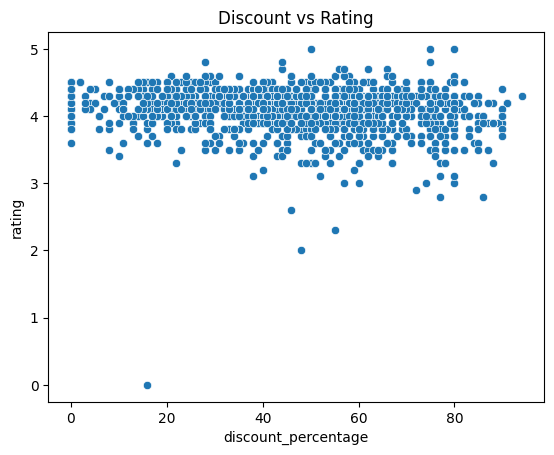

In [82]:
sns.scatterplot(data=df1, x='discount_percentage', y='rating')
plt.title('Discount vs Rating')
plt.show()


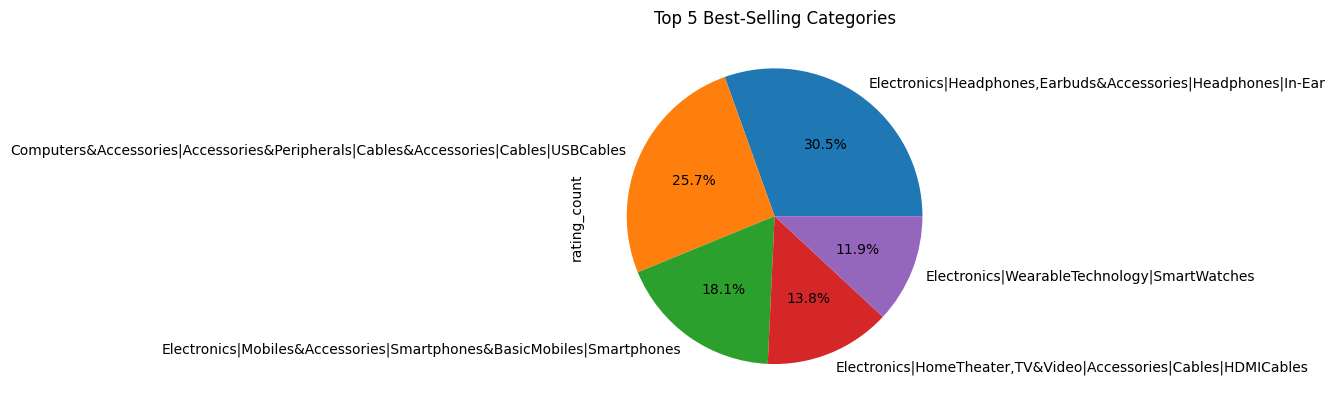

In [83]:
df1.groupby('category')['rating_count'].sum().nlargest(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Best-Selling Categories')
plt.show()


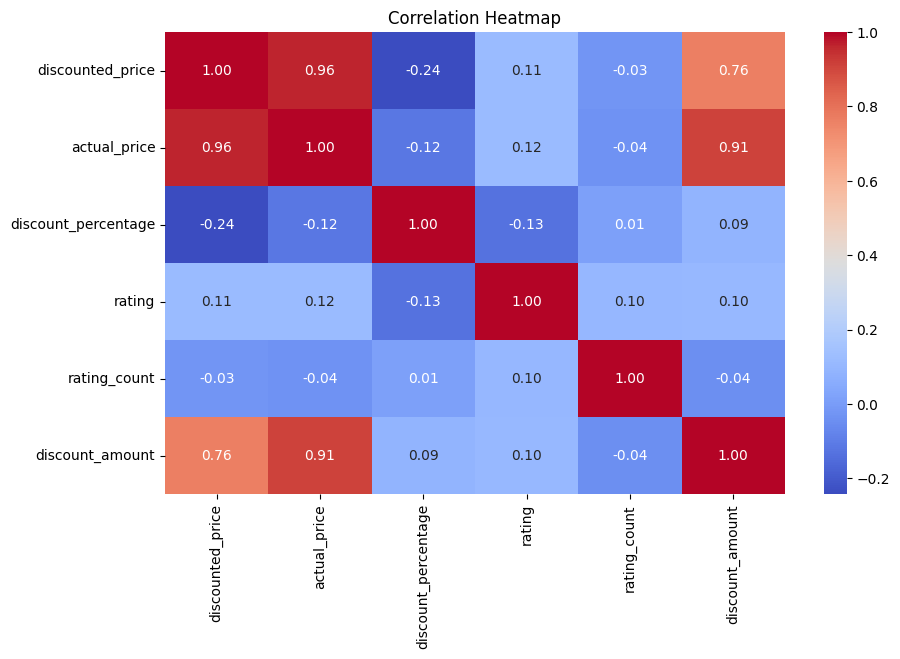

In [86]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
